In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random 


In [3]:
stanja=[["A",1],["A",2],["A",3],["A",4],["A",5],["B",1],["B",3],["B",5]]
pocetno=stanja[0]
ter_stanja=[["B",1],["B",3],["B",5]]

In [72]:
akcije=['dole','levo','gore','desno']

fak_umanjenja=0.9
epsilon=0.7
iteracije=1000
Pt=0.6
Pl=0.2
Pd=0.2

In [73]:
Q = {}
V = {}
for i in stanja:
    if i == ['B',5]:
        Q[tuple(i)] = np.ones(4) * 3
    elif i == ['B',1] or i == ['B',3]:
        Q[tuple(i)] = np.ones(4) * (-1)
    else:
        Q[tuple(i)] = np.zeros(4)
    V[tuple(i)] = np.zeros(iteracije)


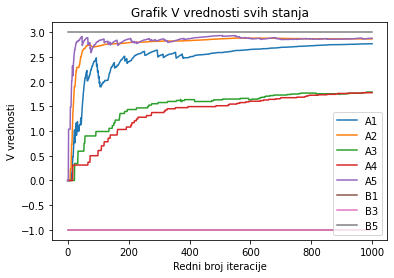

In [74]:
stanje_A = [['A', 1], ['A', 2], ['A', 3], ['A', 4], ['A', 5]]
for i in range(iteracije):
  alfa=np.log(1+i) / (1+i)
  #alfa=0.03
  #print(alfa)
  pom_stanje=pocetno
  pom=1
  while provera(pom_stanje):
    slucajan=np.random.rand()
    if slucajan > epsilon:
        a=akcije[np.argmax(Q[tuple(pom_stanje)])]
        
    else:
        s=np.random.randint(low=0,high=4)#od 0 do 3 
        a=akcije[s]
    #print(pom_stanje,a)    
    novo=korak(pom_stanje,a)
    #print(novo)
    q= nagrada(pom_stanje)+fak_umanjenja*max(Q[tuple(novo)])
    
    Q[tuple(pom_stanje)][akcije.index(a)] += alfa*(q-Q[tuple(pom_stanje)][akcije.index(a)])
    pom_stanje=novo
   
  for j in stanja:
         
         V[tuple(j)][i] = max(Q[tuple(j)])
           
plt.figure()
for i in stanja:
    plt.plot(V[tuple(i)])
plt.title('Grafik V vrednosti svih stanja')
plt.xlabel('Redni broj iteracije')
plt.ylabel('V vrednosti')
plt.legend(['A1','A2','A3','A4','A5','B1','B3','B5',],loc='best')
plt.show()

In [75]:
politika = []
for i in stanje_A:
    politika.append(akcije[np.argmax(Q[tuple(i)])])
print(politika)

['gore', 'levo', 'levo', 'levo', 'dole']


In [76]:
epoha_test = 10
score = 0
for i in range(epoha_test):
    pom_stanje = ['A', 1]
    brojac = 0
    while  provera(pom_stanje):
        pom_akcija = akcije[np.argmax(Q[tuple(pom_stanje)])]
        
        novo_stanje = korak(pom_stanje, pom_akcija)
        
        pom_stanje = novo_stanje
        brojac += 1
    score += fak_umanjenja**brojac*nagrada(pom_stanje)
    #print(pom_stanje)
    #print(score, nagrada(pom_stanje))
ukupna_nagrada = score/epoha_test
print("Prosecna ukupna nagrada koju agent osvaja je "+str(ukupna_nagrada),"za faktor umanjenja "+str(fak_umanjenja))


Prosecna ukupna nagrada koju agent osvaja je 2.976408834636218 za faktor umanjenja 0.999


In [9]:
def provera(stanje):
  if stanje[0] == 'B':
    return False
  else:
    return True

In [8]:
def korak(stanje,akcija):
  ver=np.random.randn()
  #eliminisemo prva terminalna stanja koja nas vracaju u pocetno stanje tj [A,1]
  if stanje[0]=='B':
    novo=pocetno
    return novo
  #gledamo kada hoce da ide gore
  #do 0.6 da ide kuda treba, od 0.6 do 0.8 da ide levo, ostalo desno
  if (akcija == 'gore'):
    if ver >0.6 and ver <0.8: #idemo levo
       if stanje[1]==1: #ako se nlazai u [A,1] nema gde levo ostaje tu
          novo=pocetno
       else:
         novo=stanje_A[stanja.index(stanje)-1] #pomera se ulevo npr  ['A', 3] se vraca u ['A', 2]
       
    elif ver > 0.8: #skrecemo desno
        if stanje[1]==5: #ako se nlazai u [A,5] nema gde desno ostaje tu
          novo=stanje
        else:
         novo=stanje_A[stanja.index(stanje)+1] #pomera se udesno npr ['A', 2] idemo u ['A', 3] 
    else:
        novo=stanje #posto smo u A i ako idemo gore udaramo u zid pa ostajemo tu gde smo
  if (akcija =='dole'):
      if ver<=0.6: #znaci idemo dole dole     
         if stanje[1]==2 or stanje[1]==4: #za ta stanja udara u zid
            novo=stanje
         else:
           novo=['B',stanje[1]]#odlazimo u neka terminalna stanja 
      elif ver>0.8: #ide desno
           if stanje[1]==5:
             novo=stanje
           else:
             novo=stanje_A[stanja.index(stanje)+1] #pomera se udesno npr ['A', 2] idemo u ['A', 3]     
      else: #ide ulevo  
          if stanje[1]==1:
             novo=stanje
          else:
             novo=stanje_A[stanja.index(stanje)-1] #pomera se ulevo npr  ['A', 3] se vraca u ['A', 2]
  if (akcija =='levo'):
    if ver <= 0.6: #idemo levo levo
       if stanje[1]==1:
          novo=stanje #ako je u [a,1] pa levo znaci udara u zid
       else:
         novo=stanje_A[stanje_A.index(pocetno)-1]
    elif ver>0.8:# umesto levo ide gore sto znaci udara u zid bez obzira gde se nalazi
       novo = stanje
    else: #levo ali dole
        if stanje[1]==2 or stanje[1]==4: #za ta stanja udara u zid
            novo=stanje
        else:
           novo=['B',stanje[1]]#odlazimo u neka terminalna stanja 
  if (akcija =='desno'):
     if ver <= 0.6: #idemo desno desno
       if stanje[1]==5:
          novo=stanje #ako je u [a,5] pa desno znaci udara u zid
       else:
         novo=stanje_A[stanje_A.index(pocetno)+1]
     elif ver>0.8:# umesto desno ide gore sto znaci udara u zid bez obzira gde se nalazi
       novo = stanje
     else: #desno ali dole
        if stanje[1]==2 or stanje[1]==4: #za ta stanja udara u zid
            novo=stanje
        else:
           novo=['B',stanje[1]] #odlazimo u neka terminalna stanja 

  return novo           


In [7]:
def nagrada(stanje):
  if stanje in stanje_A:
     return 0
  elif stanje == ['B',5]:
      return 3  
  else:
     return -1

